# **Predicting the outcomes of chess games**
### Author: Rigels Hita

##   1. Introduction

The problem we are trying to solve in this notebook is to predict the outcome of a chess game. Given a set of chess games in the PGN format, we will use machine learning techniques to build a model that can predict the winner of a game. We will be using the dataset "10000 Chess games with centipawn loss", which contains 10000 chess games with various chess moves.

The libraries we will be using in this notebook include pandas, numpy, and scikit-learn. Pandas will be used for data manipulation and cleaning, numpy will be used for numerical computations and scikit-learn will be used for building and evaluating machine learning models.

During this project different machine learning models such as Logistic Regression, Random Forest and Decision Tree Classifier will be explored to predict the winner of a chess game. Some hyperparameter tuning will take place to find the optimal values.

To evaluate the performance of our model, we will be using classification metrics such as accuracy, precision, recall and F1-score. We will be using a hold-out test set to evaluate the model performance and will compare the performance of different models to decide which one is the best.

# 2. Dataset characterization 


The dataset consists of 10000+ chess games played between chess players under FIDE(International Chess Federation)rules.It contains some interesting columns(features) that may be proven useful for our machine learning models to predict the outcome of chess games.The 'Results' column is going to be our label and its rows represent the outcome of the chess game.
- Result: 0 white wins, 1-draw, 2-black wins.

# 3. Data preprocessing

### 3.1 Importing Libraries

- NumPy is a library that is used for working with large arrays and matrices of numerical data, as well as for performing mathematical operations on these arrays. It provides functions for performing operations such as mathematical, logical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations, etc.

- Pandas is a library that is used for data manipulation and analysis. It provides functions for reading and writing data, handling missing data, and manipulating data in a variety of ways, such as merging, reshaping, and aggregating data. It also provides powerful data structures such as DataFrame and Series for handling and analyzing data.

- Matplotlib and Seaborn are used to create visualizations of the data. These plots can be helpful for understanding the characteristics of the data and for identifying patterns or trends.

- SciPy is a library built on top of NumPy and provides a collection of mathematical algorithms and functions such as optimization,linear algebra,signal and image processing, etc. It also provides a number of high-level functions that are built on top of the lower-level NumPy and SciPy functions, making it easy to perform common tasks such as fitting models to data, solving differential equations, and optimization.

- Scikit-learn is a library that is used for machine learning tasks such as classification, regression, clustering, and dimensionality reduction. 

- The warnings library in Python is used to issue warnings to the user about potential problems or situations that may arise in their code. In this case it will be used to suppress warning messages that may be generated while running the code.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')


### 3.2 Importing Data 

- Dataset is loaded into a pandas dataframe
- The first five rows of the dataframe are displayed using the head() function.
- value.counts() function is used to check how many chess games has white won, black won or ended in a draw

In [2]:
data=pd.read_csv('C:/Users/Rigels/FinalProject/10480_games_with_centipawn_metrics.csv')#loading the data into a pandas df

In [3]:
data.head()

,Unnamed: 0,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,PGN,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
1,0,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
2,0,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
3,0,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
4,0,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN


In [4]:
print(data.Result.value_counts())

1    4281
0    3703
2    2494
*       2
Name: Result, dtype: int64


### 3.3 Data cleaning,transforming and organizing


In [5]:
#Finding out data types for each column in our dataset
data.dtypes

Unnamed: 0                        object
Date                              object
Event Name                        object
Event Rounds                      object
Round                             object
White Name                        object
Black Name                        object
Result                            object
White ELO                        float64
Black ELO                        float64
Moves                            float64
White Av CP Loss                 float64
Black Av CP Loss                 float64
Evaluations List                  object
White CP Loss List                object
Black CP Loss List                object
PGN                               object
Analysis Depth                   float64
White Expected Rating by ACPL    float64
Black Expected Rating by ACPL    float64
dtype: object

In [6]:
# Checking for null values in the dataset 
data.isnull().sum()

Unnamed: 0                           0
Date                               110
Event Name                         136
Event Rounds                       155
Round                              142
White Name                         142
Black Name                         142
Result                             142
White ELO                          142
Black ELO                          142
Moves                              142
White Av CP Loss                   142
Black Av CP Loss                   142
Evaluations List                   142
White CP Loss List                 142
Black CP Loss List                 142
PGN                                142
Analysis Depth                     143
White Expected Rating by ACPL    10608
Black Expected Rating by ACPL    10608
dtype: int64

In [7]:
# Defining the indexes of df with null values as players
i = data[data['White Name'].isna()].index

In [8]:
# Droping the rows were there is no White players name
data = data.drop(i)

In [9]:
#droping the strange "*" character from every row of the Result column
data= data[data["Result"].str.contains("\*") == False]

In [10]:
# Filling in missing values with the mode (most common value) of that column
data['Analysis Depth'] = data['Analysis Depth'].fillna(data['Analysis Depth'].mode()[0])

In [11]:
# Estimating the missing event round with the mode (most common value) of that column
data['Event Rounds'] = data['Event Rounds'].fillna(data['Event Rounds'].mode()[0])


In [12]:
#re-checking the amount of null values
data.isnull().sum()

Unnamed: 0                           0
Date                                 0
Event Name                           0
Event Rounds                         0
Round                                0
White Name                           0
Black Name                           0
Result                               0
White ELO                            0
Black ELO                            0
Moves                                0
White Av CP Loss                     0
Black Av CP Loss                     0
Evaluations List                     0
White CP Loss List                   0
Black CP Loss List                   0
PGN                                  0
Analysis Depth                       0
White Expected Rating by ACPL    10466
Black Expected Rating by ACPL    10466
dtype: int64

In [13]:
#Droping columns that contain no useful information
data = data.drop(columns = ['Unnamed: 0', 'PGN', 'White Expected Rating by ACPL', 'Black Expected Rating by ACPL'])

In [14]:
#Having a look at the statistics of the numerical values of df
data.describe()

,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Analysis Depth
count,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000
mean,2534.930139,2526.249571,44.279156,26.836801,28.504676,20.002291
std,215.427960,233.380039,17.929716,16.568383,17.720415,0.067648
min,893.000000,700.000000,0.000000,0.000000,0.000000,20.000000
25%,2439.000000,2430.000000,33.000000,15.000000,15.000000,20.000000
50%,2558.000000,2553.000000,41.000000,23.000000,25.000000,20.000000
75%,2688.000000,2686.000000,54.000000,35.000000,39.000000,20.000000
max,2882.000000,2882.000000,182.000000,458.000000,476.000000,22.000000


# 4. Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='White ELO', ylabel='Black ELO'>

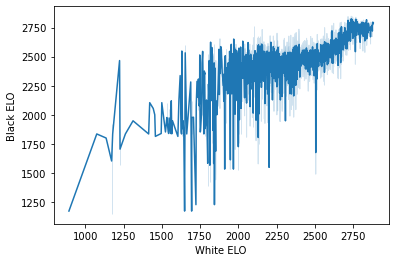

In [15]:
sns.lineplot(data=data, x="White ELO", y="Black ELO")

This graph indicates that there is a correlation between Black ELO and White ELO which is due to the structure of the ELO system and tournament modes meaning strong players will get paired against strong players

<AxesSubplot:xlabel='White ELO', ylabel='Count'>

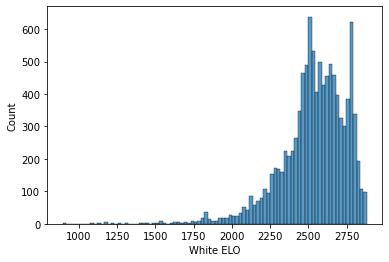

In [16]:
sns.histplot(data['White ELO'])

<AxesSubplot:xlabel='Black ELO', ylabel='Count'>

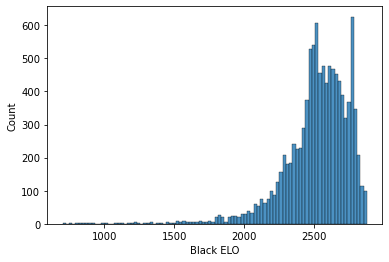

In [17]:
sns.histplot(data['Black ELO'], alpha=0.8)

From these histogram plots of playing ELO it can be seen that the sample for ELOs below 2300 is very low

In [18]:
#Creating a new column ELO difference.
#It is the difference in ELO between the player with the white pieces and player with the black pieces
data['ELO_diff'] = data['White ELO']-data['Black ELO']

In [19]:
data.head()

,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,Analysis Depth,ELO_diff
0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...",20.0,378.0
1,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...",20.0,-200.0
2,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...",20.0,194.0
3,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...",20.0,207.0
4,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...",20.0,-103.0


In [20]:
#average centipawn loss for the higher rated player 
acpl_higher = []
#average centipawn loss for the lower rated player
acpl_lower = []
# a method in the pandas library that allows you to iterate over the rows of a DataFrame
for index, row in data.iterrows():
    if row['ELO_diff'] >= 0:
        acpl_higher.append(row['White Av CP Loss'])
        acpl_lower.append(row['Black Av CP Loss'])
    elif row['ELO_diff'] < 0:
        acpl_lower.append(row['White Av CP Loss'])
        acpl_higher.append(row['Black Av CP Loss'])

In [21]:
print(f'The average CP loss of the higher rated player was {np.round(np.mean(acpl_higher),2)}, while the lower rated player had a CP loss of {np.round(np.mean(acpl_lower),2)}') 

The average CP loss of the higher rated player was 24.55, while the lower rated player had a CP loss of 30.79


In [22]:
data['ACPL Lower'] = acpl_lower
data['ACPL Higher'] = acpl_higher 

Text(0.5, 1.0, 'Higher Rated Player')

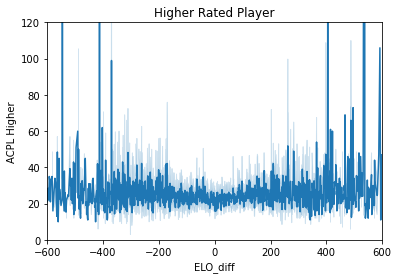

In [23]:
p = sns.lineplot(data=data, x='ELO_diff', y='ACPL Higher')
p.set(ylim=(0, 120), xlim=(-600, 600))
p.set_title('Higher Rated Player')

Text(0.5, 1.0, 'Lower Rated Player')

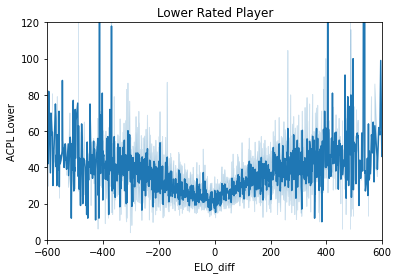

In [24]:
l = sns.lineplot(data=data, x='ELO_diff', y='ACPL Lower')
l.set(ylim=(0, 120), xlim=(-600, 600))
l.set_title('Lower Rated Player')

In the case of the lower rated player the ELO difference matters much more than for the higher ELO player, who seems to have more or less the same accuracy whether playing against a player with similiar ELO or a weaker player.



# 5. Model Building

We can start building our machine learning models. We are going to use several different machine learning models and compare their performance.The models that are going to be used are as follows:

- Logistic Regression is a simple and widely-used classification algorithm that is suitable for classification tasks. It is a linear model that uses an equation to make predictions based on the input features, and it is easy to interpret and implement.

- A Decision Tree is a type of machine learning algorithm used for classification and regression tasks. It creates a tree-like model of decisions and their possible consequences, with each internal node representing a feature or attribute, and each leaf node representing a class label.

- Random forest is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction of the individual trees. The idea behind random forest is to decorrelate the trees by training them on different subsets of the data, and to average their predictions. This reduces overfitting and improves the overall performance of the model.

In [25]:
#appending every feature of type object to a list for further processing
object_features_list=[]
for element in data.columns:
    if((data[element].dtypes=='object') & (element!='Result')):
        object_features_list.append(element)

In [26]:
labelencoder=LabelEncoder()

In [27]:
# transforming non-numerical labels to numerical labels
for element in object_features_list:
    data[element]=labelencoder.fit_transform(data[element])

In [28]:
#no more object type data(except Result) in the dataset since labelencoder transformed them
data.dtypes

Date                    int32
Event Name              int32
Event Rounds            int32
Round                   int32
White Name              int32
Black Name              int32
Result                 object
White ELO             float64
Black ELO             float64
Moves                 float64
White Av CP Loss      float64
Black Av CP Loss      float64
Evaluations List        int32
White CP Loss List      int32
Black CP Loss List      int32
Analysis Depth        float64
ELO_diff              float64
ACPL Lower            float64
ACPL Higher           float64
dtype: object

In [29]:
#assigning x all the features
x = data.drop(columns=['Result'])
#assinging y the labels
y = data['Result']

### 5.1 Splitting the data

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

### 5.2 Logistic Regression

In [31]:
lr_model=LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_model.fit(xtrain, ytrain)
y_lr_train_pred = lr_model.predict(xtrain)
y_lr_test_pred = lr_model.predict(xtest)

In [32]:
print(f'Train score {accuracy_score(y_lr_train_pred,ytrain)}')
print(f'Test score {accuracy_score(y_lr_test_pred,ytest)}')

Train score 0.9607308426506681
Test score 0.9675572519083969


In [33]:
print(classification_report(ytest, y_lr_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1115
           1       0.95      0.98      0.96      1311
           2       0.97      0.95      0.96       718

    accuracy                           0.97      3144
   macro avg       0.97      0.97      0.97      3144
weighted avg       0.97      0.97      0.97      3144



##### 5.2.1 Confusion Matrix

In [34]:
#function for ploting the confusion matrix
def plot_confusionmatrix(ytrain_pred,ytrain,dom):
    print(f'{dom} confusion matrix')
    cf = confusion_matrix(ytrain_pred,ytrain)
    sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
    plt.tight_layout()
    plt.show()

Train confusion matrix


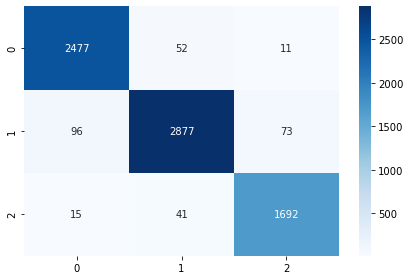

Test confusion matrix


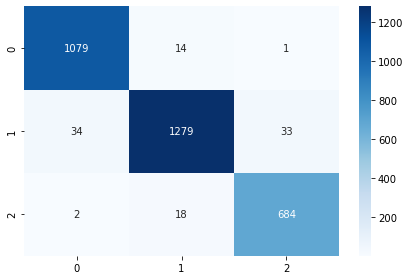

In [35]:
plot_confusionmatrix(y_lr_train_pred,ytrain,dom='Train')
plot_confusionmatrix(y_lr_test_pred,ytest,dom='Test')

##### 5.2.2 Cross Validation

In [36]:
# Perform 10-fold cross-validation on the model
scores = cross_val_score(lr_model, xtrain, ytrain, cv=10)

# Print the mean and standard deviation of the scores
print(f'Mean score: {scores.mean():.3f}')
print(f'Standard deviation: {scores.std():.3f}')


Mean score: 0.959
Standard deviation: 0.009


### 5.3 Decision Tree Classifier

In [37]:
dtc_model = tree.DecisionTreeClassifier(random_state=0)
dtc_model.fit(xtrain,ytrain)
y_dtc_train_pred = dtc_model.predict(xtrain)
y_dtc_test_pred = dtc_model.predict(xtest)

In [38]:
print(f'Train score {accuracy_score(y_dtc_train_pred,ytrain)}')
print(f'Test score {accuracy_score(y_dtc_test_pred,ytest)}')

Train score 1.0
Test score 0.9243002544529262


In [39]:
print(classification_report(ytest, y_dtc_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1115
           1       0.92      0.91      0.92      1311
           2       0.93      0.92      0.93       718

    accuracy                           0.92      3144
   macro avg       0.93      0.92      0.92      3144
weighted avg       0.92      0.92      0.92      3144



##### 5.3.1 Confusion Matrix 

Train data confusion matrix


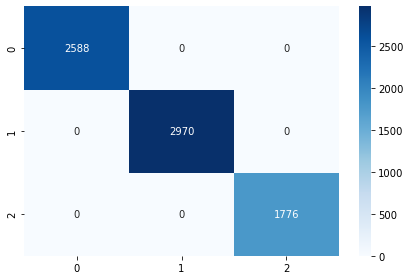

Test data confusion matrix


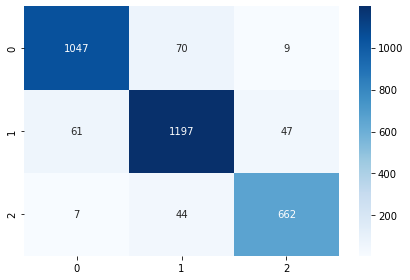

In [40]:
plot_confusionmatrix(y_dtc_train_pred,ytrain,dom='Train data')
plot_confusionmatrix(y_dtc_test_pred,ytest,dom='Test data')

##### 5.3.2 Cross Validation

In [41]:
# Perform 10-fold cross-validation on the model
scores = cross_val_score(dtc_model, xtrain, ytrain, cv=10)

# Print the mean and standard deviation of the scores
print(f'Mean score: {scores.mean():.3f}')
print(f'Standard deviation: {scores.std():.3f}')

Mean score: 0.925
Standard deviation: 0.009


##### 5.3.3 Hyperparameter tuning

In [42]:
params = {'max_depth':[2,4,6,8,10,12],
         'min_samples_split':[2,3,4],
         'min_samples_leaf':[1,2]}
dtc_model = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=dtc_model,param_grid=params)
gcv.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [43]:
gcv_model = gcv.best_estimator_
gcv_model.fit(xtrain,ytrain)
y_gcv_train_pred = gcv_model.predict(xtrain)
y_gcv_test_pred = gcv_model.predict(xtest)
print(f'Train score {accuracy_score(y_gcv_train_pred,ytrain)}')
print(f'Test score {accuracy_score(y_gcv_test_pred,ytest)}')

Train score 0.9721843468775566
Test score 0.9395674300254453


##### 5.3.3.1 Tuned Confusion Matrix

Train confusion matrix


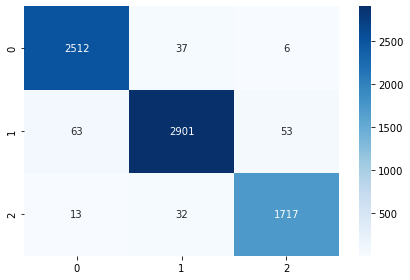

Test confusion matrix


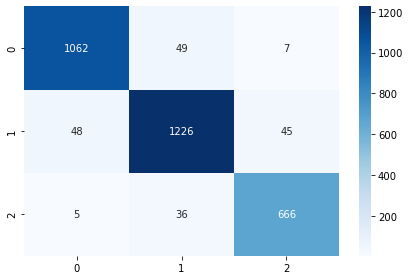

In [44]:
plot_confusionmatrix(y_gcv_train_pred,ytrain,dom='Train')
plot_confusionmatrix(y_gcv_test_pred,ytest,dom='Test')

### 5.4 Random Forest Classifier

In [45]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)
y_rf_train_pred = rf_model.predict(xtrain)
y_rf_test_pred = rf_model.predict(xtest)

In [46]:
print(f'Train score {accuracy_score(y_rf_train_pred,ytrain)}')
print(f'Test score {accuracy_score(y_rf_test_pred,ytest)}')

Train score 1.0
Test score 0.960559796437659


In [47]:
print(classification_report(ytest, y_rf_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1115
           1       0.96      0.95      0.95      1311
           2       0.96      0.96      0.96       718

    accuracy                           0.96      3144
   macro avg       0.96      0.96      0.96      3144
weighted avg       0.96      0.96      0.96      3144



##### 5.4.1 Confusion Matrix

Train data confusion matrix


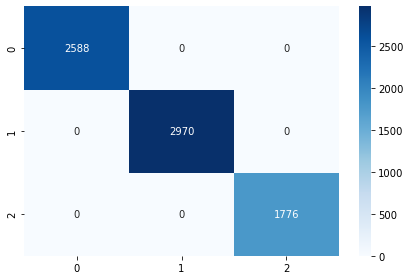

Test data confusion matrix


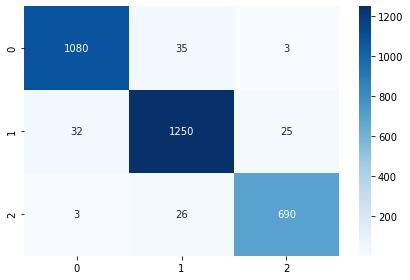

In [48]:
plot_confusionmatrix(y_rf_train_pred,ytrain,dom='Train data')
plot_confusionmatrix(y_rf_test_pred,ytest,dom='Test data')

##### 5.4.2 Cross Validation

In [49]:
# Perform 10-fold cross-validation on the model
scores = cross_val_score(rf_model, xtrain, ytrain, cv=10)

# Print the mean and standard deviation of the scores
print(f'Mean score: {scores.mean():.3f}')
print(f'Standard deviation: {scores.std():.3f}')

Mean score: 0.955
Standard deviation: 0.007


# 6. Conclusions

In this project, we tried to build a chess games outcome predicotr using machine learning techniques.The first step was collecting and preprocessing the data.After that exploring the data to gain insights and find patterns.Several different machine learning models were tried and tested.Their performance was compared using cross-validation and evaluation metrics such as accuracy, precision, recall, and f1-score. Finally, tuning the hyperparameters of the Decision Tree Classifier model to improve its performance. The tuned Decission Tree Classifier model achieved an accuracy  93.7% on the test data from 92.4% before tuning. Logistic Regression and Random Forest Classifier both achieved ~96% accuracy.

### 6.1 Self-critical Assessment

One of the most challenging aspects of this project was preprocessing the text data. Cleaning and preparing the dataset for analysis required a lot of effort and time. However, this was also one of the strong aspects of our analysis, as the quality of the input data greatly affects the accuracy of the model.
Another strong aspect of the analysis was the comprehensive evaluation of multiple machine learning models. By comparing the performance of different models, we were able to choose the best one for our dataset.In our case Logistic Regression and Random Forest Classifier both achieved a comparable accuracy of ~96% which is considered very good for this task.
A weak point of this approach was the lack of fine-tuning the hyperparameters of the chosen models. While some hyperparameter tuning for Decision Tree Classifier was done,the other models did not go through this process.Even though the other models had a very good accuracy of 96%,hyperparameter tuning may have increased it even more.
Additionally a larger and more diverse dataset cpuld have been used to improve the generalizability of our model.